In [7]:
import os

In [8]:
os.chdir(r"D:\SAMITH\Github\wine-quality-predictor")

### Importing the Libraries

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt 
%matplotlib inline 
warnings.filterwarnings('ignore')

### Loading the Dataset

In [11]:
df = pd.read_csv(r"artifacts\data_ingestion\data\winequalityN.csv")


In [12]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Basic Statistics

In [13]:
# Display the Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Preprocessing the Dataset¶

In [16]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [20]:
df.shape

(6497, 13)

### Exploratory Data Analysis

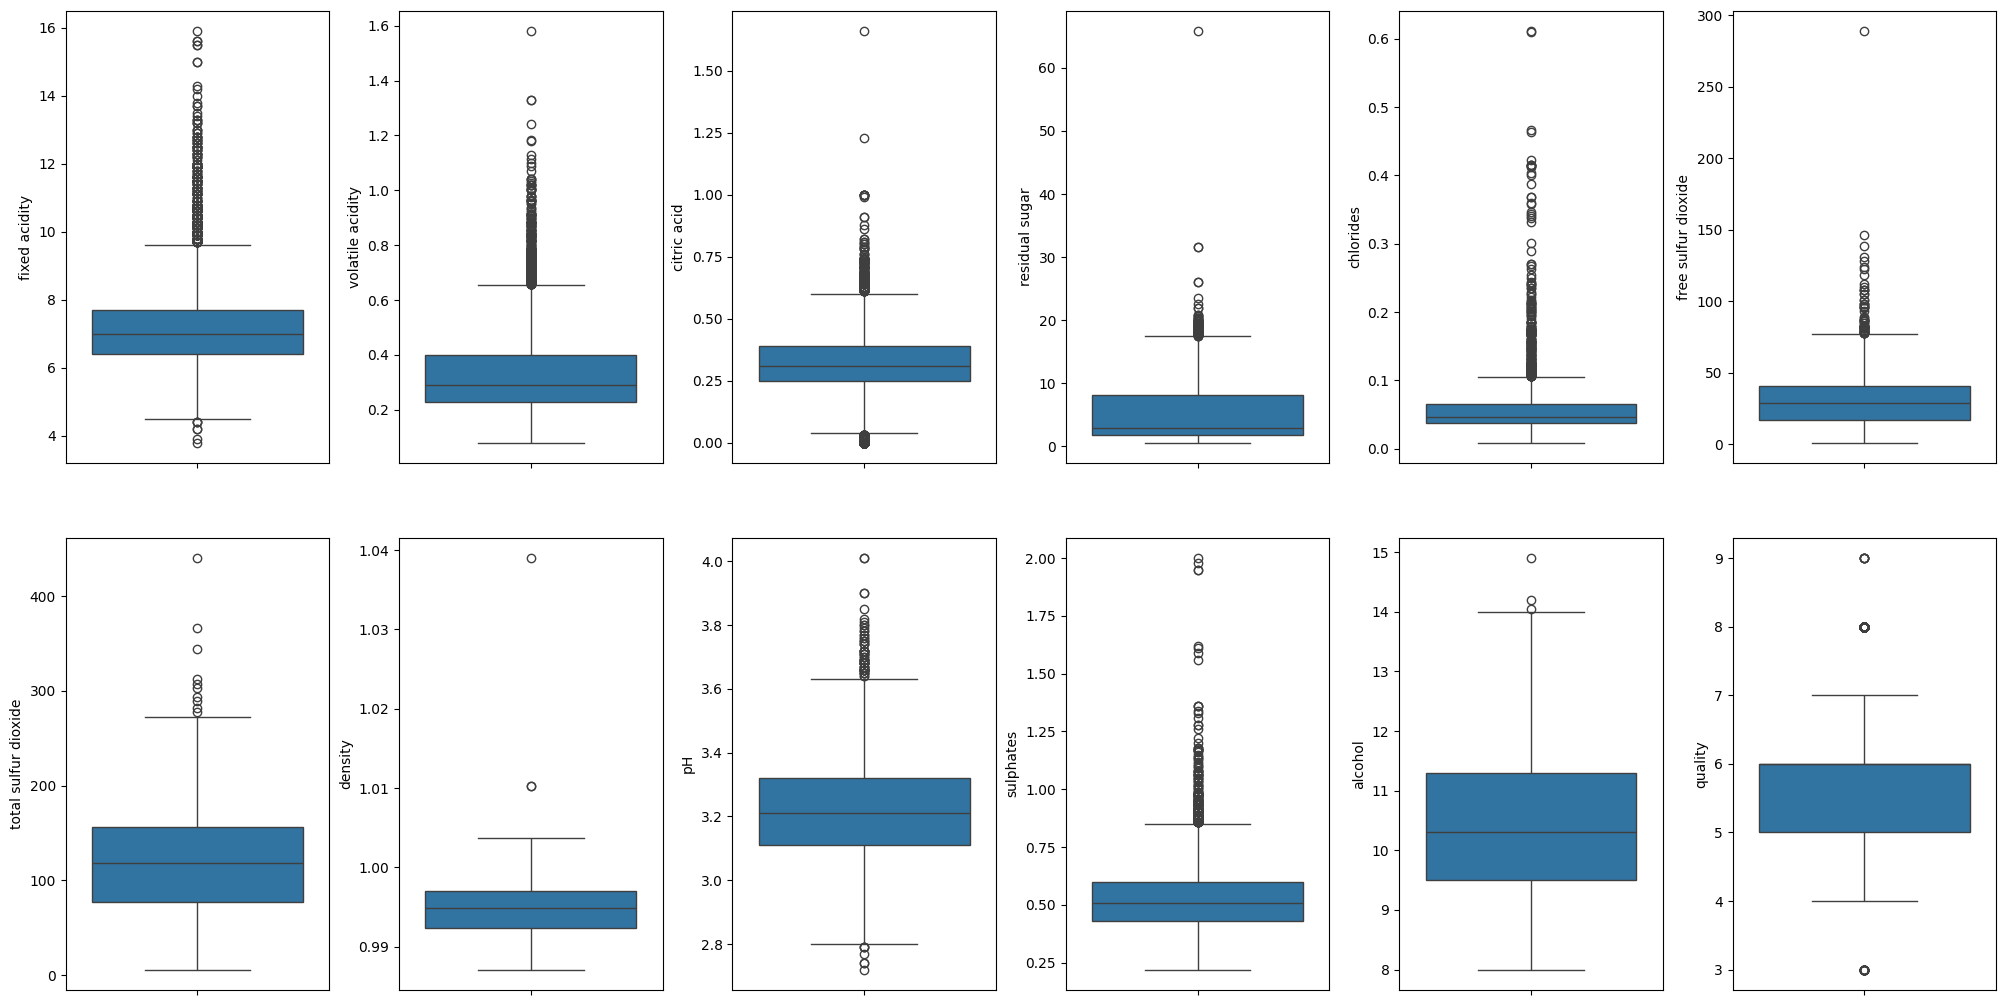

In [21]:
# Create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.items():
    if col != 'type': 
        sns.boxplot(y =col, data=df, ax= ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

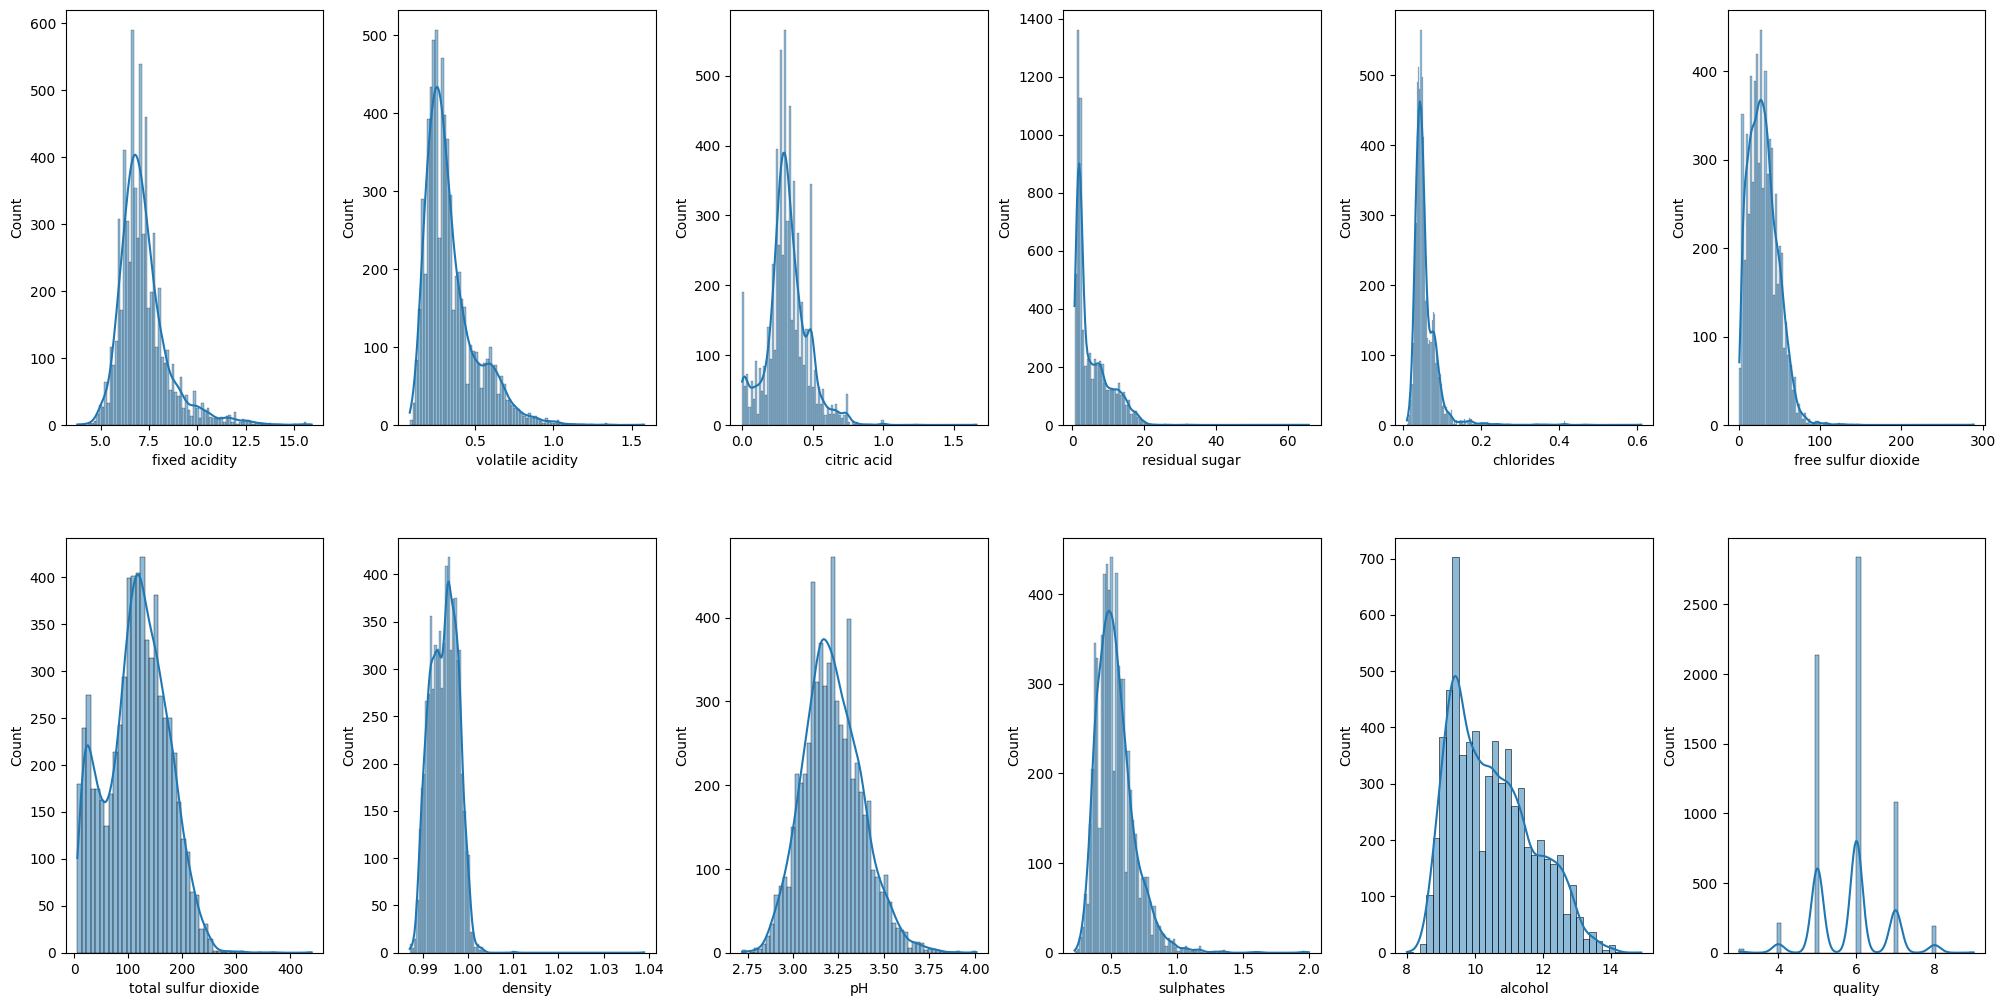

In [25]:
#Create the Histplot 

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.items():
    if col != 'type': 
        sns.histplot( value, ax= ax[index],kde=True)
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [52]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    """Data Validation Configuration"""
    root_dir: Path
    STATUS_FILE: str
    data_dir : Path
    all_schema: dict


In [53]:
from wine_quality_predictor.constants import *
from wine_quality_predictor.utils.common import read_yaml, create_directories

In [54]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS
        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            data_dir=config.data_dir,
            all_schema=schema
        )
        return data_validation_config

In [55]:
import os
from wine_quality_predictor import logger


In [56]:
class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self) -> bool:
        try:
            df = pd.read_csv(self.config.data_dir)
            all_cols = list(df.columns)
            all_schema = self.config.all_schema.keys()
            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"validation status: {validation_status}")
            return validation_status
        except Exception as e:
            raise e

In [57]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(config=data_validation_config)
    data_validation.validate_all_columns()


except Exception as e:
    raise e

[2025-04-30 16:32:40,076: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-04-30 16:32:40,082: INFO: common: yaml file: params.yaml loaded successfully]
[2025-04-30 16:32:40,085: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-04-30 16:32:40,087: INFO: common: created directory at: artifacts]
[2025-04-30 16:32:40,089: INFO: common: created directory at: artifacts/data_validation]
